In [3]:
import numpy as np # linear algebra
import pandas as pd

In [39]:
train_data = pd.read_csv("C:/Users/SKW/Desktop/train.csv")
test_data = pd.read_csv("C:/Users/SKW/Desktop/test.csv")

In [40]:
train_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [41]:
test_data.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import TensorDataset, DataLoader

In [44]:
# Scaling Data
scaler = MinMaxScaler()
train_data_normalized = scaler.fit_transform(train_data.drop('species', axis=1))
test_data_normalized = scaler.transform(test_data)

# Label Encoding the Species column
label_encoder = LabelEncoder()
train_data['labels'] = label_encoder.fit_transform(train_data['species'])
classes = label_encoder.classes_
test_ids = test_data['id']
# Split Data
X = train_data.drop(['species', 'id', 'labels'], axis=1)
y = train_data['labels']
test_ids = test_data['id']

### 데이터 스케일링
- minmaxScaler로 데이터 특성을 0과 1 사이의 범위로 조정
- train set은 species 열 빼주고 나머지 데이터 스케일링
- test set은 스케일링<br>
### 레이블 인코딩
- 범주형 레이블을 수치형으로
- species 문자열을 수치형으로

In [45]:
# Remaining code remains unchanged
features_train, features_val, labels_train, labels_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Split Data
features_train, features_val, labels_train, labels_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(features_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(labels_train.values, dtype=torch.long)
X_val_tensor = torch.tensor(features_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(labels_val.values, dtype=torch.long)

# Define the dataset and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

### 데이터 분할
### 파이토치 텐서로 변환
### 정의
- 특성과 레이블 텐서를 결합해 하나의 데이터 셋으로
- 각 배치에 64개의 데이터 포함
- Shuffle = True로 무작위로 데이터 섞어서 훈련

In [46]:
# Neural Network class without softmax in the last layer 
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
        super(NeuralNetwork, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_size1),
            nn.BatchNorm1d(hidden_size1),  # Batch Normalization
            nn.ReLU(),
            nn.Dropout(0.5), # Dropout layer
            nn.Linear(hidden_size1, hidden_size2),
            nn.BatchNorm1d(hidden_size2),  # Batch Normalization
            nn.ReLU(),
            nn.Dropout(0.5), # Dropout layer
            nn.Linear(hidden_size2, hidden_size3),
            nn.BatchNorm1d(hidden_size3),  # Batch Normalization
            nn.ReLU(),
            nn.Dropout(0.5), # Dropout layer
            nn.Linear(hidden_size3, output_size)
        )

    def forward(self, x):
        return self.layers(x)

### 클래스 정의
- nn.Linear : 선형레이어
- nn.BatchNormid : 배치 정규화 레이어 / 학습 안정화
- nn.ReLU : 비선형 활성화 함수
- 드롭아웃 0.5로 레이어드 노드 중 50퍼를 무작위 제거
- forward로 순차적으로 신경망을 지나가도록

In [48]:
# Function to train the model and return losses and accuracies
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=15):
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        epoch_train_losses, correct_train, total_train = 0.0, 0, 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_train_losses += loss.item()
            _, predicted_train = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted_train == labels).sum().item()

        train_loss = epoch_train_losses / len(train_loader)
        train_accuracy = correct_train / total_train

        # Validation phase
        model.eval()
        epoch_val_losses, correct_val, total_val = 0.0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                val_outputs = model(inputs)
                val_loss = criterion(val_outputs, labels)

                epoch_val_losses += val_loss.item()
                _, predicted_val = torch.max(val_outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted_val == labels).sum().item()

        val_loss = epoch_val_losses / len(val_loader)
        val_accuracy = correct_val / total_val

        # Append losses and accuracies to lists
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_accuracy)
        val_accs.append(val_accuracy)

        # Print progress
        print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}')

    return train_losses, val_losses, train_accs, val_accs

### 함수 정의

train_losses, val_losses는 각 에포크마다의 학습 및 검증 손실을 저장함
train_accs, val_accs는 각 에포크마다의 학습 및 검증 정확도를 저장함

##### 에포크별 학습 및 검증 과정

학습 단계:
- model.train(): 모델을 학습 모드로 설정합니다.
반복문을 통해 훈련 데이터 로더에서 배치(inputs, labels)를 가져와 모델에 적용합니다.
- optimizer.zero_grad(): 그래디언트를 초기화합니다.
- loss.backward(): 손실에 대한 그래디언트를 계산합니다.
- optimizer.step(): 옵티마이저를 사용해 모델의 파라미터를 업데이트합니다.
손실과 정확도를 계산하여 학습 손실과 정확도를 업데이트합니다.
검증 단계:
- model.eval(): 모델을 평가 모드로 설정합니다.
- torch.no_grad(): 그래디언트 계산을 비활성화하여 메모리 사용량을 줄이고 계산 속도를 높입니다.
검증 데이터를 사용하여 모델의 성능을 평가하고, 손실과 정확도를 계산합니다.
결과 저장 및 출력:

각 에포크의 학습 및 검증 손실, 정확도를 리스트에 추가합니다.
각 에포크의 결과를 출력합니다.

##### 최종 결과 반환:
학습 및 검증 손실과 정확도 리스트를 반환합니다.

In [49]:
# Initialize models with different architectures
model1 = NeuralNetwork(input_size=len(X.columns), hidden_size1=16, hidden_size2=8, hidden_size3=4, output_size=len(classes))
model2 = NeuralNetwork(input_size=len(X.columns), hidden_size1=32, hidden_size2=16, hidden_size3=8, output_size=len(classes))
model3 = NeuralNetwork(input_size=len(X.columns), hidden_size1=64, hidden_size2=32, hidden_size3=16, output_size=len(classes))
# Initialize model with Dropout
model4 = NeuralNetwork(input_size=len(X.columns), hidden_size1=128, hidden_size2=64, hidden_size3=32, output_size=len(classes))

In [50]:
# Set hyperparameters
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer1 = optim.Adam(model1.parameters(), lr=learning_rate)
optimizer2 = optim.Adam(model2.parameters(), lr=learning_rate)
optimizer3 = optim.Adam(model3.parameters(), lr=learning_rate)
# Set hyperparameters
optimizer4 = optim.Adam(model4.parameters(), lr=learning_rate)
# Scheduler for learning rate
scheduler = optim.lr_scheduler.StepLR(optimizer4, step_size=10, gamma=0.1)

# Train models
train_losses1, val_losses1, train_accs1, val_accs1 = train_model(model1, criterion, optimizer1, train_loader, val_loader)
train_losses2, val_losses2, train_accs2, val_accs2 = train_model(model2, criterion, optimizer2, train_loader, val_loader)
train_losses3, val_losses3, train_accs3, val_accs3 = train_model(model3, criterion, optimizer3, train_loader, val_loader)


Epoch 1/15, Train Loss: 4.7513, Val Loss: 4.6129, Train Acc: 0.0076, Val Acc: 0.0101
Epoch 2/15, Train Loss: 4.7191, Val Loss: 4.6391, Train Acc: 0.0088, Val Acc: 0.0101
Epoch 3/15, Train Loss: 4.6944, Val Loss: 4.6488, Train Acc: 0.0051, Val Acc: 0.0101
Epoch 4/15, Train Loss: 4.6824, Val Loss: 4.6346, Train Acc: 0.0126, Val Acc: 0.0101
Epoch 5/15, Train Loss: 4.6479, Val Loss: 4.6097, Train Acc: 0.0088, Val Acc: 0.0000
Epoch 6/15, Train Loss: 4.6486, Val Loss: 4.5871, Train Acc: 0.0051, Val Acc: 0.0000
Epoch 7/15, Train Loss: 4.6080, Val Loss: 4.5793, Train Acc: 0.0051, Val Acc: 0.0051
Epoch 8/15, Train Loss: 4.6260, Val Loss: 4.5768, Train Acc: 0.0114, Val Acc: 0.0051
Epoch 9/15, Train Loss: 4.6129, Val Loss: 4.5802, Train Acc: 0.0177, Val Acc: 0.0051
Epoch 10/15, Train Loss: 4.6117, Val Loss: 4.5780, Train Acc: 0.0126, Val Acc: 0.0051
Epoch 11/15, Train Loss: 4.6120, Val Loss: 4.5750, Train Acc: 0.0139, Val Acc: 0.0051
Epoch 12/15, Train Loss: 4.6172, Val Loss: 4.5738, Train Acc: 

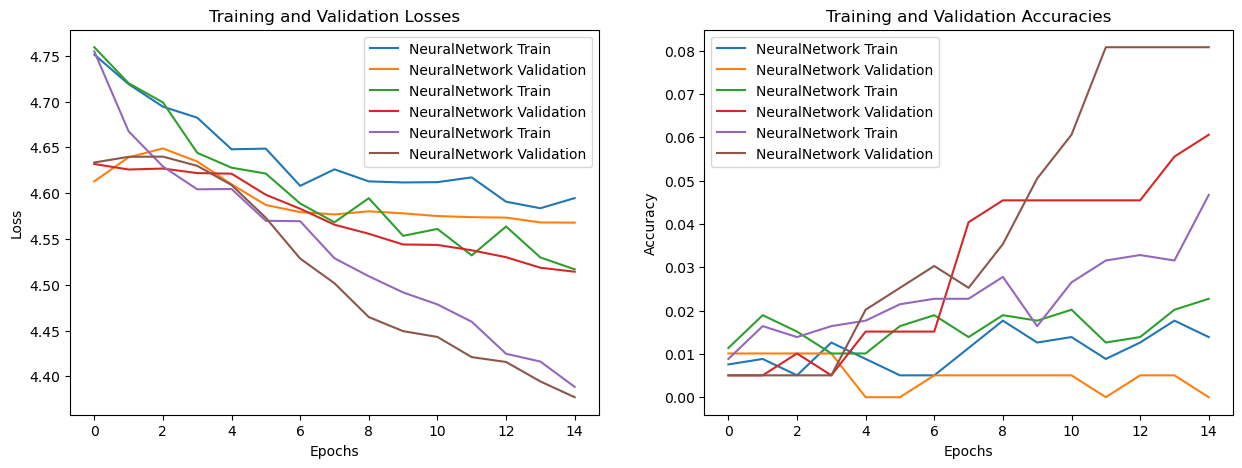

In [51]:
# Plot results
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
for model, train_losses, val_losses in zip([model1, model2, model3], [train_losses1, train_losses2, train_losses3], [val_losses1, val_losses2, val_losses3]):
    plt.plot(train_losses, label=f'{model.__class__.__name__} Train')
    plt.plot(val_losses, label=f'{model.__class__.__name__} Validation')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()

plt.subplot(1, 2, 2)
for model, train_accs, val_accs in zip([model1, model2, model3], [train_accs1, train_accs2, train_accs3], [val_accs1, val_accs2, val_accs3]):
    plt.plot(train_accs, label=f'{model.__class__.__name__} Train')
    plt.plot(val_accs, label=f'{model.__class__.__name__} Validation')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()

plt.show()